In [2]:
import matplotlib.pyplot as plt

In [3]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\soura\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [2]:
from utils import *
pd.set_option('display.max_columns' , None)

In [3]:
base_path = os.getcwd()
path = os.path.join(base_path , 'Fortune 500 2017 - Fortune 500.csv')
frt_500 = pd.read_csv(path)
# Rank seems to be pretty useless - it is based on Revenue 
frt_500 = frt_500.drop('Rank' , axis = 1)

In [4]:
# There are no null values!
frt_500.isnull().sum().sum()

0

In [4]:
frt_500.dtypes

Title           object
Website         object
Employees        int64
Sector          object
Industry        object
Hqlocation      object
Hqaddr          object
Hqcity          object
Hqstate         object
Hqzip            int64
Hqtel           object
Ceo             object
Ceo-title       object
Address         object
Ticker          object
Fullname        object
Revenues         int64
Revchange      float64
Profits        float64
Prftchange      object
Assets           int64
Totshequity    float64
dtype: object

In [5]:
# Some transformations
# 1. HQZIP shouldn't be int64 - it is a categorical variable
frt_500['Hqzip'] = frt_500['Hqzip'].astype('str')
# 2. Prftchange shouldn't be an object - it is a float. However it needs to be preprocessed - there are some commas etc
frt_500['Prftchange'] = frt_500['Prftchange'].apply(lambda x : x.replace(',',''))
frt_500['Prftchange'] = frt_500['Prftchange'].astype('float64')

frt_500.dtypes

Title           object
Website         object
Employees        int64
Sector          object
Industry        object
Hqlocation      object
Hqaddr          object
Hqcity          object
Hqstate         object
Hqzip           object
Hqtel           object
Ceo             object
Ceo-title       object
Address         object
Ticker          object
Fullname        object
Revenues         int64
Revchange      float64
Profits        float64
Prftchange     float64
Assets           int64
Totshequity    float64
dtype: object

In [6]:
frt_500.describe()

,Employees,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
count,5.000000e+02,500.000000,500.00000,500.000000,500.000000,5.000000e+02,500.0000
mean,5.635013e+04,24111.748000,3.75800,1779.479800,26.579200,8.038934e+04,13640.1470
std,1.234520e+05,38337.353337,19.96748,3937.558721,649.036355,2.704257e+05,30523.1538
min,8.300000e+01,5145.000000,-57.50000,-6177.000000,-1499.600000,4.370000e+02,-12688.0000
25%,1.190000e+04,7245.000000,-3.82500,235.725000,-20.300000,8.436500e+03,1997.5000
50%,2.500000e+04,11384.000000,1.90000,683.600000,2.250000,1.932450e+04,4981.0000
75%,5.682525e+04,22605.250000,7.32500,1770.775000,20.450000,4.812600e+04,12467.7500
max,2.300000e+06,485873.000000,197.30000,45687.000000,12450.000000,3.287968e+06,283001.0000


In [7]:
frt_500.describe(include = 'object')

,Title,Website,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname
count,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,500,499,21,73,246,491,239,37,372,499,496,12,494,468,500
top,Walmart,http://www.abbott.com,Financials,Utilities: Gas and Electric,"New York, NY",12300 Liberty Blvd.,New York,NY,10022,650-857-1501,Gregory J. Goff,"President, Chief Executive Officer & Director","400 Atlantic St., Stamford, CT 06901",NFLX,"Wal-Mart Stores, Inc."
freq,1,2,84,22,45,2,45,54,8,2,2,189,2,3,1


### Basic EDAs

In [8]:
frt_500.head()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,C. Douglas McMillon,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,Warren E. Buffett,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0.0,620854,283001.0
2,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,Timothy D. Cook,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,Darren W. Woods,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,John H. Hammergren,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53.0,56563,8924.0


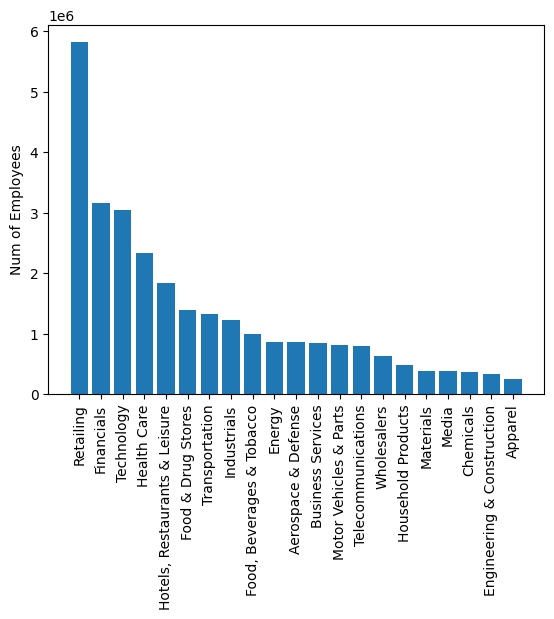

In [13]:
# 1. which sector has most employees/ most revenue?
# 2. which industry is the highest among each of these sectors?
# 3. where are most headquarters located?
# 4. which sector/ industry holds most assets?
# 5. which sector/ industry makes the most profit?
# 6. What do distributions of numerical values look like?

df = frt_500.groupby('Sector').agg({'Employees':'sum'}).reset_index().sort_values('Employees' , ascending = False)
plt.bar(df.Sector , df.Employees);
plt.xticks(rotation = 90);
plt.ylabel('Num of Employees');

In [14]:
df

,Sector,Employees
16,Retailing,5819887
6,Financials,3161998
17,Technology,3049348
9,Health Care,2341423
10,"Hotels, Restaurants & Leisure",1838742
7,Food & Drug Stores,1390095
19,Transportation,1331195
12,Industrials,1224296
8,"Food, Beverages & Tobacco",1000309
4,Energy,869511


In [52]:
df = frt_500.groupby(['Sector','Industry']).agg({'Employees':'sum'}).reset_index().sort_values('Employees' , ascending = False)
df

,Sector,Industry,Employees
53,Retailing,General Merchandisers,3377600
56,Retailing,Specialty Retailers: Other,1623143
17,Financials,Commercial Banks,1451368
25,Food & Drug Stores,Food and Drug Stores,1390095
35,"Hotels, Restaurants & Leisure",Food Services,1289942
...,...,...,...
54,Retailing,Internet Services and Retailing,21080
5,Business Services,Miscellaneous,12500
45,Materials,Forest and Paper Products,10400
69,Transportation,Transportation Equipment,6000


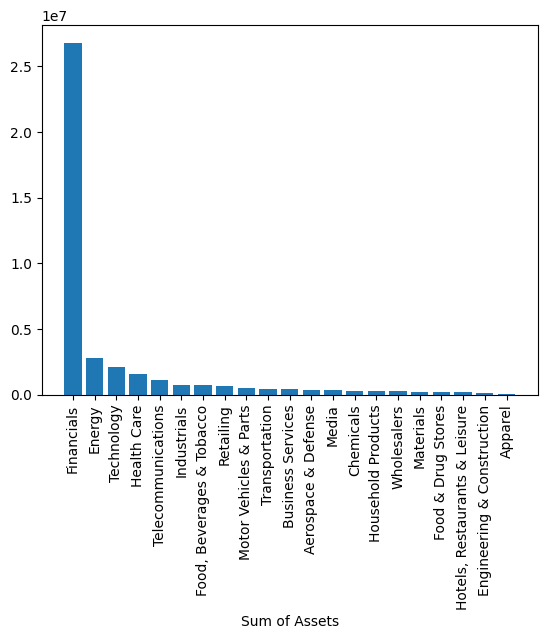

In [15]:
df = frt_500.groupby(['Sector']).agg({'Assets':'sum'}).reset_index().sort_values('Assets' , ascending = False)
plt.bar(df.Sector , df.Assets);
plt.xticks(rotation = 90);
plt.xlabel('Sum of Assets');

In [16]:
df

,Sector,Assets
6,Financials,26816588
4,Energy,2779104
17,Technology,2080354
9,Health Care,1598998
18,Telecommunications,1149227
12,Industrials,762236
8,"Food, Beverages & Tobacco",697434
16,Retailing,680238
15,Motor Vehicles & Parts,534988
19,Transportation,440674


In [58]:
df = frt_500.groupby(['Sector','Industry']).agg({'Assets':'sum'}).reset_index().sort_values('Assets' , ascending = False)
df

,Sector,Industry,Assets
17,Financials,Commercial Banks,13015550
18,Financials,Diversified Financials,6192265
20,Financials,"Insurance: Life, Health (Stock)",2703647
22,Financials,Insurance: Property and Casualty (Stock),2199637
19,Financials,"Insurance: Life, Health (Mutual)",1534602
...,...,...,...
6,Business Services,Temporary Help,11380
44,Materials,"Building Materials, Glass",10651
69,Transportation,Transportation Equipment,9890
39,Household Products,"Toys, Sporting Goods",6494


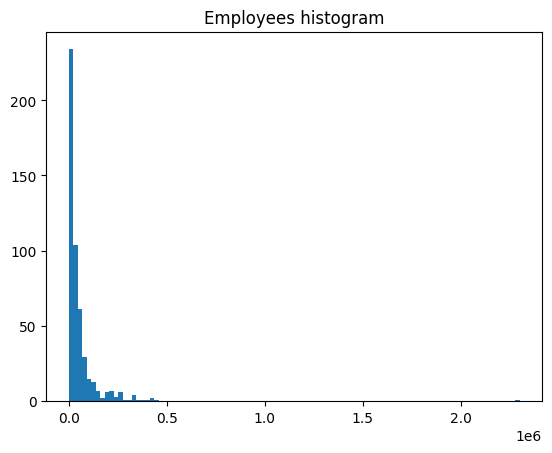

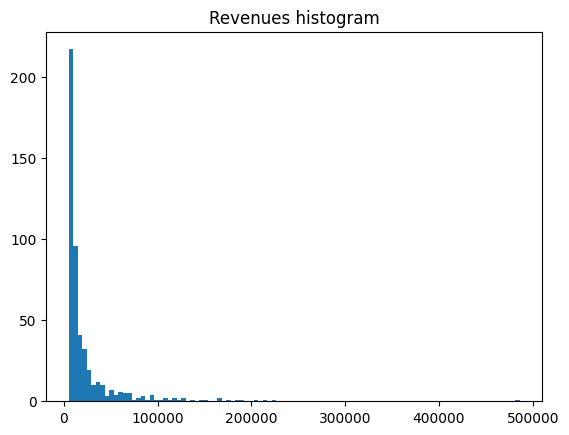

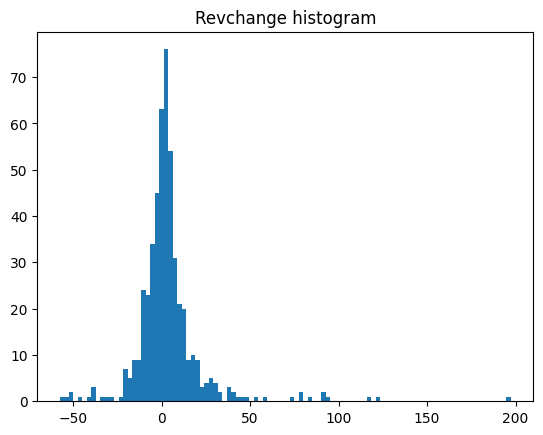

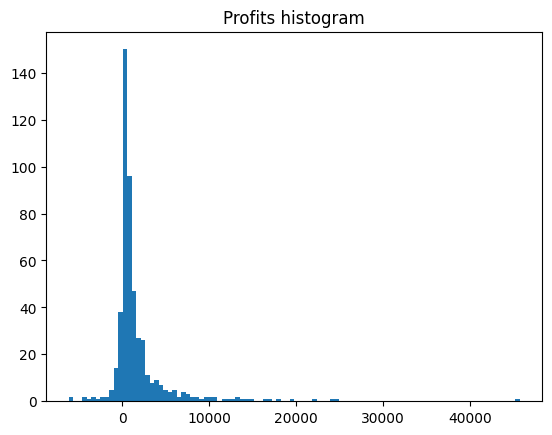

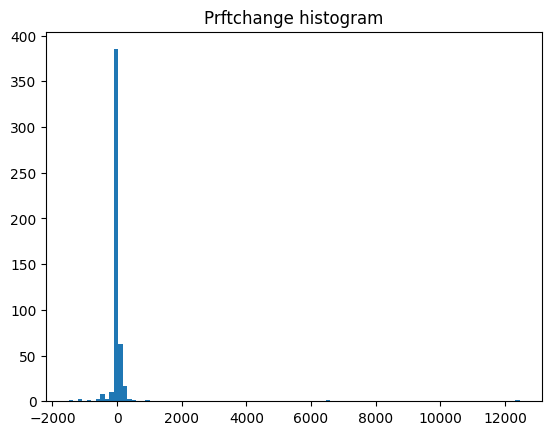

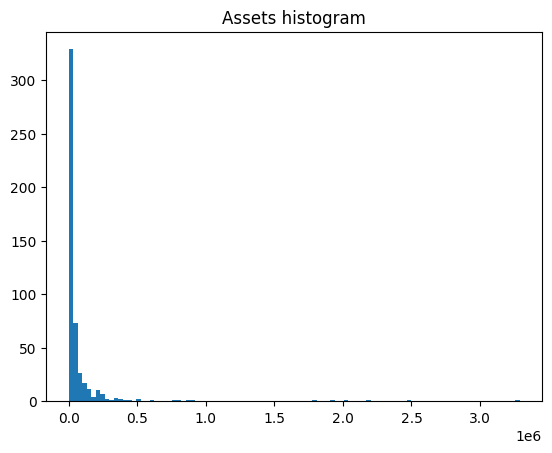

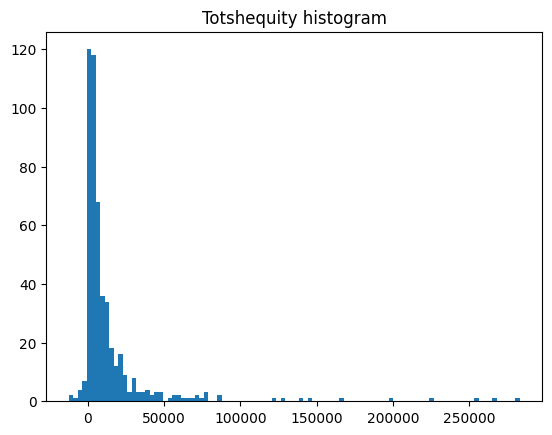

In [53]:
num_covs = list(frt_500.describe().columns)

for cov in num_covs:
    fig , ax = plt.subplots()
    ax.hist(frt_500[cov] , bins = 100);
    ax.set_title(f'{cov} histogram');

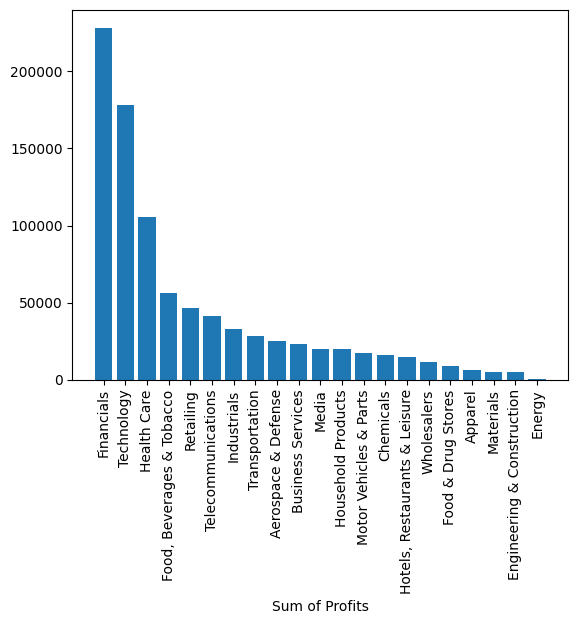

In [17]:
df = frt_500.groupby(['Sector']).agg({'Profits':'sum'}).reset_index().sort_values('Profits' , ascending = False)
plt.bar(df.Sector , df.Profits);
plt.xticks(rotation = 90);
plt.xlabel('Sum of Profits');

In [18]:
df

,Sector,Profits
6,Financials,228461.2
17,Technology,177901.4
9,Health Care,105383.9
8,"Food, Beverages & Tobacco",56308.4
16,Retailing,46613.9
18,Telecommunications,41272.8
12,Industrials,32826.1
19,Transportation,28395.0
0,Aerospace & Defense,25119.7
2,Business Services,23107.1


<AxesSubplot: >

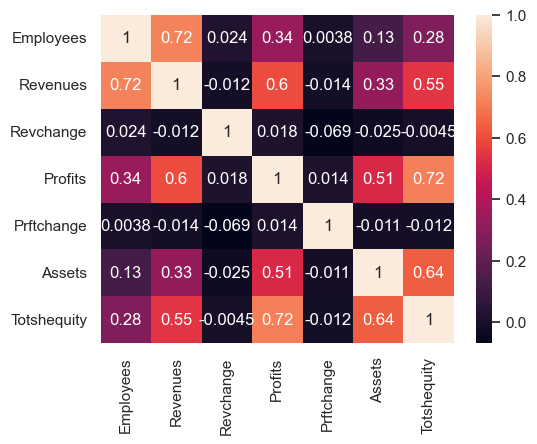

In [65]:
sns.heatmap(frt_500.corr(numeric_only=True) , annot = True)